<a href="https://colab.research.google.com/github/hridayanikaruna/SentimenAnalysisTripAdvisorNusaDua/blob/main/Klasifikasi_Review_Hotel_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Pre Processing

### Read Data

In [ ]:
file_path = '/content/sample_data/raw.csv'
df = pd.read_csv(file_path)
df

,_id,date_of_stay,rating,resort_name,review,title
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...
...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy


In [ ]:
df['title_review'] = df['title'] + ' ' + df['review']
df

,_id,date_of_stay,rating,resort_name,review,title,title_review
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,DO NOT GO HERE Absolutely disgusted. Got off o...
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,Nuclear disaster Post apocaliptic experience. ...
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,Worst experience on holiday in 30 years so tha...
...,...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,Great rooms pool in shade all day long these r...
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,Better places to stay This place looked great ...
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,Enjoyed it! We stayed there while soft opening...
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new and trendy i have just returned from 2 nig...


### Case Folding

In [ ]:
def case_folding(text):
    text = text.lower()
    return text

df['title_review_case_folding'] = df['title_review'].apply(lambda x: case_folding(x))
df

,_id,date_of_stay,rating,resort_name,review,title,title_review,title_review_case_folding
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,DO NOT GO HERE Absolutely disgusted. Got off o...,do not go here absolutely disgusted. got off o...
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...,dirtiest hotel in bali stay away. please other...
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,Nuclear disaster Post apocaliptic experience. ...,nuclear disaster post apocaliptic experience. ...
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...,worst experience ever!!! it’s a scam!!!!\n\nto...
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,Worst experience on holiday in 30 years so tha...,worst experience on holiday in 30 years so tha...
...,...,...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,Great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,Better places to stay This place looked great ...,better places to stay this place looked great ...
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,Enjoyed it! We stayed there while soft opening...,enjoyed it! we stayed there while soft opening...
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from 2 nig...


### Remove Char, hastag, http

In [ ]:
def remove_char(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t#])|(\w+:\/\/\S+)|(\d+)"," ", text).split())
    return text

df['title_review_remove_char'] = df['title_review_case_folding'].apply(lambda x: remove_char(x))
df

,_id,date_of_stay,rating,resort_name,review,title,title_review,title_review_case_folding,title_review_remove_char
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,DO NOT GO HERE Absolutely disgusted. Got off o...,do not go here absolutely disgusted. got off o...,do not go here absolutely disgusted got off ou...
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...,dirtiest hotel in bali stay away. please other...,dirtiest hotel in bali stay away please other ...
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,Nuclear disaster Post apocaliptic experience. ...,nuclear disaster post apocaliptic experience. ...,nuclear disaster post apocaliptic experience a...
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...,worst experience ever!!! it’s a scam!!!!\n\nto...,worst experience ever it s a scam toilet choke...
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,Worst experience on holiday in 30 years so tha...,worst experience on holiday in 30 years so tha...,worst experience on holiday in years so thank ...
...,...,...,...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,Great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,Better places to stay This place looked great ...,better places to stay this place looked great ...,better places to stay this place looked great ...
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,Enjoyed it! We stayed there while soft opening...,enjoyed it! we stayed there while soft opening...,enjoyed it we stayed there while soft opening ...
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from night...


### Remove Stopword

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopword(x):
    remove_stopwords = ' '.join([word for word in x.split() if word.lower() not in stop_words])
    return remove_stopwords

df['title_review_stopword'] = df['title_review_remove_char'].apply(lambda x: remove_stopword(x))
df

,_id,date_of_stay,rating,resort_name,review,title,title_review,title_review_case_folding,title_review_remove_char,title_review_stopword
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,DO NOT GO HERE Absolutely disgusted. Got off o...,do not go here absolutely disgusted. got off o...,do not go here absolutely disgusted got off ou...,go absolutely disgusted got flight arrived vil...
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...,dirtiest hotel in bali stay away. please other...,dirtiest hotel in bali stay away please other ...,dirtiest hotel bali stay away please reviews p...
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,Nuclear disaster Post apocaliptic experience. ...,nuclear disaster post apocaliptic experience. ...,nuclear disaster post apocaliptic experience a...,nuclear disaster post apocaliptic experience a...
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...,worst experience ever!!! it’s a scam!!!!\n\nto...,worst experience ever it s a scam toilet choke...,worst experience ever scam toilet choke power ...
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,Worst experience on holiday in 30 years so tha...,worst experience on holiday in 30 years so tha...,worst experience on holiday in years so thank ...,worst experience holiday years thank agoda bal...
...,...,...,...,...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,Great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool shade day long rooms huge kit...
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,Better places to stay This place looked great ...,better places to stay this place looked great ...,better places to stay this place looked great ...,better places stay place looked great initital...
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,Enjoyed it! We stayed there while soft opening...,enjoyed it! we stayed there while soft opening...,enjoyed it we stayed there while soft opening ...,enjoyed stayed soft opening price vey good usd...
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from night...,new trendy returned nights stay brand new reso...


### Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
def stemming(x):
    stemming = ' '.join([stemmer.stem(word) for word in x.split()])
    return stemming

df['title_review_stemming'] = df['title_review_stopword'].apply(lambda x: stemming(x))
df

,_id,date_of_stay,rating,resort_name,review,title,title_review,title_review_case_folding,title_review_remove_char,title_review_stopword,title_review_stemming
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,DO NOT GO HERE Absolutely disgusted. Got off o...,do not go here absolutely disgusted. got off o...,do not go here absolutely disgusted got off ou...,go absolutely disgusted got flight arrived vil...,go absolut disgust got flight arriv villa met ...
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...,dirtiest hotel in bali stay away. please other...,dirtiest hotel in bali stay away please other ...,dirtiest hotel bali stay away please reviews p...,dirtiest hotel bali stay away pleas review pla...
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,Nuclear disaster Post apocaliptic experience. ...,nuclear disaster post apocaliptic experience. ...,nuclear disaster post apocaliptic experience a...,nuclear disaster post apocaliptic experience a...,nuclear disast post apocalipt experi avoid pla...
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...,worst experience ever!!! it’s a scam!!!!\n\nto...,worst experience ever it s a scam toilet choke...,worst experience ever scam toilet choke power ...,worst experi ever scam toilet choke power trip...
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,Worst experience on holiday in 30 years so tha...,worst experience on holiday in 30 years so tha...,worst experience on holiday in years so thank ...,worst experience holiday years thank agoda bal...,worst experi holiday year thank agoda bali ric...
...,...,...,...,...,...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,Great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool shade day long rooms huge kit...,great room pool shade day long room huge kitch...
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,Better places to stay This place looked great ...,better places to stay this place looked great ...,better places to stay this place looked great ...,better places stay place looked great initital...,better place stay place look great initit cut ...
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,Enjoyed it! We stayed there while soft opening...,enjoyed it! we stayed there while soft opening...,enjoyed it we stayed there while soft opening ...,enjoyed stayed soft opening price vey good usd...,enjoy stay soft open price vey good usd bedroo...
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from night...,new trendy returned nights stay brand new reso...,new trendi return night stay brand new resort ...


### Tokenization

In [ ]:
nltk.download('punkt')

def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

df['title_review_token'] = df['title_review_stemming'].apply(lambda x: tokenize_text(x))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,_id,date_of_stay,rating,resort_name,review,title,title_review,title_review_case_folding,title_review_remove_char,title_review_stopword,title_review_stemming,title_review_token
0,6465e09a5e043bc11053ea16,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,DO NOT GO HERE Absolutely disgusted. Got off o...,do not go here absolutely disgusted. got off o...,do not go here absolutely disgusted got off ou...,go absolutely disgusted got flight arrived vil...,go absolut disgust got flight arriv villa met ...,"[go, absolut, disgust, got, flight, arriv, vil..."
1,6465e09a5e043bc11053ea17,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...,dirtiest hotel in bali stay away. please other...,dirtiest hotel in bali stay away please other ...,dirtiest hotel bali stay away please reviews p...,dirtiest hotel bali stay away pleas review pla...,"[dirtiest, hotel, bali, stay, away, pleas, rev..."
2,6465e09a5e043bc11053ea18,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,Nuclear disaster Post apocaliptic experience. ...,nuclear disaster post apocaliptic experience. ...,nuclear disaster post apocaliptic experience a...,nuclear disaster post apocaliptic experience a...,nuclear disast post apocalipt experi avoid pla...,"[nuclear, disast, post, apocalipt, experi, avo..."
3,6465e09a5e043bc11053ea19,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...,worst experience ever!!! it’s a scam!!!!\n\nto...,worst experience ever it s a scam toilet choke...,worst experience ever scam toilet choke power ...,worst experi ever scam toilet choke power trip...,"[worst, experi, ever, scam, toilet, choke, pow..."
4,6465e09a5e043bc11053ea1a,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,Worst experience on holiday in 30 years so tha...,worst experience on holiday in 30 years so tha...,worst experience on holiday in years so thank ...,worst experience holiday years thank agoda bal...,worst experi holiday year thank agoda bali ric...,"[worst, experi, holiday, year, thank, agoda, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10647,646603af5e043bc1105413ad,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,Great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool in shade all day long these r...,great rooms pool shade day long rooms huge kit...,great room pool shade day long room huge kitch...,"[great, room, pool, shade, day, long, room, hu..."
10648,646603af5e043bc1105413ae,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,Better places to stay This place looked great ...,better places to stay this place looked great ...,better places to stay this place looked great ...,better places stay place looked great initital...,better place stay place look great initit cut ...,"[better, place, stay, place, look, great, init..."
10649,646603af5e043bc1105413af,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,Enjoyed it! We stayed there while soft opening...,enjoyed it! we stayed there while soft opening...,enjoyed it we stayed there while soft opening ...,enjoyed stayed soft opening price vey good usd...,enjoy stay soft open price vey good usd bedroo...,"[enjoy, stay, soft, open, price, vey, good, us..."
10650,646603af5e043bc1105413b0,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new and trendy i have just returned from 2 nig...,new and trendy i have just returned from

In [ ]:
columns_to_keep = ['date_of_stay', 'rating', 'resort_name', 'review', 'title', 'title_review_stemming',	'title_review_token']
df = df.loc[:, columns_to_keep]
df.rename(columns={'title_review_stemming': 'title_review_clean'}, inplace=True)
df

,date_of_stay,rating,resort_name,review,title,title_review_clean,title_review_token
0,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,go absolut disgust got flight arriv villa met ...,"[go, absolut, disgust, got, flight, arriv, vil..."
1,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,dirtiest hotel bali stay away pleas review pla...,"[dirtiest, hotel, bali, stay, away, pleas, rev..."
2,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,nuclear disast post apocalipt experi avoid pla...,"[nuclear, disast, post, apocalipt, experi, avo..."
3,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,worst experi ever scam toilet choke power trip...,"[worst, experi, ever, scam, toilet, choke, pow..."
4,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,worst experi holiday year thank agoda bali ric...,"[worst, experi, holiday, year, thank, agoda, b..."
...,...,...,...,...,...,...,...
10647,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,great room pool shade day long room huge kitch...,"[great, room, pool, shade, day, long, room, hu..."
10648,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,better place stay place look great initit cut ...,"[better, place, stay, place, look, great, init..."
10649,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,enjoy stay soft open price vey good usd bedroo...,"[enjoy, stay, soft, open, price, vey, good, us..."
10650,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new trendi return night stay brand new resort ...,"[new, trendi, return, night, stay, brand, new,..."


# Labeling

In [ ]:
def convert_to_label(rating):
    if rating >= 40:
        return "1"
    elif rating == 30:
        return "0"
    elif rating >= 10:
        return "-1"

df['sentimen'] = df['rating'].apply(convert_to_label)

In [ ]:
df

,date_of_stay,rating,resort_name,review,title,title_review_clean,title_review_token,sentimen
0,May 2023,10,Bali Rich Luxury Villa,Absolutely disgusted. Got off our flight and a...,DO NOT GO HERE,go absolut disgust got flight arriv villa met ...,"[go, absolut, disgust, got, flight, arriv, vil...",-1
1,May 2023,10,Bali Rich Luxury Villa,STAY AWAY. Please other reviews this place nee...,DIRTIEST HOTEL IN BALI,dirtiest hotel bali stay away pleas review pla...,"[dirtiest, hotel, bali, stay, away, pleas, rev...",-1
2,March 2023,10,Bali Rich Luxury Villa,Post apocaliptic experience. Avoid this place ...,Nuclear disaster,nuclear disast post apocalipt experi avoid pla...,"[nuclear, disast, post, apocalipt, experi, avo...",-1
3,December 2022,10,Bali Rich Luxury Villa,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Worst Experience Ever!!!,worst experi ever scam toilet choke power trip...,"[worst, experi, ever, scam, toilet, choke, pow...",-1
4,December 2022,10,Bali Rich Luxury Villa,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Worst experience on holiday in 30 years so tha...,worst experi holiday year thank agoda bali ric...,"[worst, experi, holiday, year, thank, agoda, b...",-1
...,...,...,...,...,...,...,...,...
10647,July 2009,30,The Haven Bali Seminyak,these rooms were huge kitchen in the middle wi...,Great rooms pool in shade all day long,great room pool shade day long room huge kitch...,"[great, room, pool, shade, day, long, room, hu...",0
10648,July 2009,20,The Haven Bali Seminyak,This place looked great inititally but just di...,Better places to stay,better place stay place look great initit cut ...,"[better, place, stay, place, look, great, init...",-1
10649,April 2009,50,The Haven Bali Seminyak,We stayed there while soft opening - so the pr...,Enjoyed it!,enjoy stay soft open price vey good usd bedroo...,"[enjoy, stay, soft, open, price, vey, good, us...",1
10650,June 2009,50,The Haven Bali Seminyak,i have just returned from 2 nights stay at thi...,new and trendy,new trendi return night stay brand new resort ...,"[new, trendi, return, night, stay, brand, new,...",1


In [ ]:
sentimen_counts = df['sentimen'].value_counts()
print(sentimen_counts)

1     7859
0     1502
-1    1291
Name: sentimen, dtype: int64


# Data Training dan Data Testing

In [ ]:
# Membagi data menjadi data training dan testing
X_h1 = df['title_review_token']
y_h1 = df['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X_h1, y_h1, test_size=0.2, random_state=42)

In [ ]:
# Vektorisasi
vectorizer = CountVectorizer()
X_train_h1 = vectorizer.fit_transform([' '.join(x) for x in X_train])
y_train_h1 = y_train

In [ ]:
# Menghitung waktu model
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train_h1,y_train_h1)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.033742


In [ ]:
# Testing
X_test_h1 = vectorizer.transform([' '.join(x) for x in X_test])
y_pred_h1 = nb.predict(X_test_h1)

In [ ]:
# Evaluasi
accuracy = accuracy_score(y_test, y_pred_h1)
precision = precision_score(y_test, y_pred_h1, average='macro')
recall = recall_score(y_test, y_pred_h1, average='macro')
f1 = f1_score(y_test, y_pred_h1, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 84.89%
Precision: 73.45%
Recall: 72.42%
F1 Score: 72.87%


In [ ]:
# Cross validation

k_values = [2, 3, 5, 10]
mean_scores = []

for k in k_values:
    # Melakukan cross-validation dengan k-fold
    scores = cross_val_score(nb, X_train_h1, y_train_h1, cv=k)

    # Menghitung metrik evaluasi
    y_pred_train_h1 = nb.predict(X_train_h1)
    accuracy = accuracy_score(y_train_h1, y_pred_train_h1)
    precision = precision_score(y_train_h1, y_pred_train_h1, average='macro')
    recall = recall_score(y_train_h1, y_pred_train_h1, average='macro')
    f1 = f1_score(y_train_h1, y_pred_train_h1, average='macro')

    # Menampilkan hasil cross-validation dan metrik evaluasi
    print("Cross-Validation Scores k=", k, ": ", scores)
    print("Mean Score k=", k, ": ", scores.mean())
    print("Accuracy k=", k, ": ", accuracy)
    print("Precision k=", k, ": ", precision)
    print("Recall k=", k, ": ", recall)
    print("F1-Score k=", k, ": ", f1)
    print()

    mean_scores.append(scores.mean())

Cross-Validation Scores k= 2 :  [0.84815771 0.85070423]
Mean Score k= 2 :  0.8494309674049931
Accuracy k= 2 :  0.8962563079450768
Precision k= 2 :  0.8256367785033297
Recall k= 2 :  0.8143284168496718
F1-Score k= 2 :  0.8198714318228028

Cross-Validation Scores k= 3 :  [0.85251672 0.8471831  0.8528169 ]
Mean Score k= 3 :  0.8508389064883257
Accuracy k= 3 :  0.8962563079450768
Precision k= 3 :  0.8256367785033297
Recall k= 3 :  0.8143284168496718
F1-Score k= 3 :  0.8198714318228028

Cross-Validation Scores k= 5 :  [0.84281525 0.85152582 0.85093897 0.84389671 0.85269953]
Mean Score k= 5 :  0.8483752564261422
Accuracy k= 5 :  0.8962563079450768
Precision k= 5 :  0.8256367785033297
Recall k= 5 :  0.8143284168496718
F1-Score k= 5 :  0.8198714318228028

Cross-Validation Scores k= 10 :  [0.84290739 0.84859155 0.87089202 0.82746479 0.84741784 0.86150235
 0.84389671 0.84037559 0.84976526 0.86384977]
Mean Score k= 10 :  0.8496663254242138
Accuracy k= 10 :  0.8962563079450768
Precision k= 10 :  0

Text(70.72222222222221, 0.5, 'Real Labels')

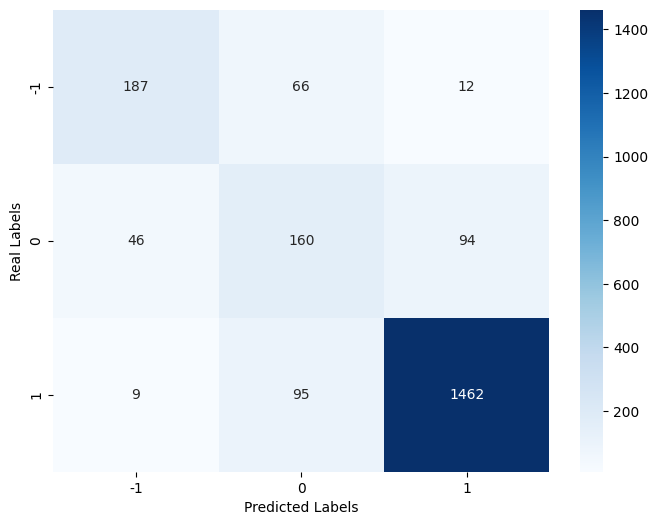

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))

conf_mat = confusion_matrix(y_test,y_pred_h1)
sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues',
            xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

# Prediksi Data

In [ ]:
X_testing_t1 = vectorizer.transform([' '.join(tokens) for tokens in df_nb['title_review_token']])
y_pred_t1 = nb.predict(X_testing_t1)

In [ ]:
df_nb['naive_bayes_testing'] = y_pred_t1
df_nb

,hotel,date_of_stay,rating,review,title,title_review_clean,title_review_token,naive_bayes_testing
0,Mulia Resort,2023-04-01,50,We stayed here for the final part of our honey...,"Huge place but extremely clean and beautiful, ...",huge place extrem clean beauti food amaz stay ...,"[huge, place, extrem, clean, beauti, food, ama...",1
1,Mulia Resort,2023-03-01,50,Excellent family destination. This is my 7th v...,Excellent stay,excel stay excel famili destin th visit hotel ...,"[excel, stay, excel, famili, destin, th, visit...",1
2,Mulia Resort,2023-01-01,50,"The minute you step into the lobby, the view c...",Worth the money,worth money minut step lobbi view caught atten...,"[worth, money, minut, step, lobbi, view, caugh...",1
3,Mulia Resort,2023-04-01,50,We had a very nice time here.\nI thought that ...,Easter holiday at Mulia Bali,easter holiday mulia bali nice time thought ea...,"[easter, holiday, mulia, bali, nice, time, tho...",1
4,Mulia Resort,2023-04-01,50,I’ve been coming to Mulia for their food as th...,Best Resort in Bali,best resort bali come mulia food buffet dinner...,"[best, resort, bali, come, mulia, food, buffet...",1
...,...,...,...,...,...,...,...,...
1202,Sofitel,2022-11-01,50,Sofitel Nusa Dua is very recomended. This hote...,Favorit Playground,favorit playground sofitel nusa dua recomend h...,"[favorit, playground, sofitel, nusa, dua, reco...",1
1203,Sofitel,2022-11-01,50,We had the most wonderful time here. Stayed fo...,Heavenly,heavenli wonder time stay night friend swim ro...,"[heavenli, wonder, time, stay, night, friend, ...",1
1204,Sofitel,2022-11-01,50,Very pleasant birthday surprise by the staffs ...,Birthday surprise,birthday surpris pleasant birthday surpris sta...,"[birthday, surpris, pleasant, birthday, surpri...",1
1205,Sofitel,2022-11-01,50,We just come to sofitel for honeymoon trip wit...,Honey moon trip in bali,honey moon trip bali come sofitel honeymoon tr...,"[honey, moon, trip, bali, come, sofitel, honey...",1


In [ ]:
grouped_data = df_nb.groupby('rating')['naive_bayes_testing'].unique()
for rating, values in grouped_data.items():
    print("Rating:", rating)
    print("Nilai Naive Bayes Training:", values)
    print()

Rating: 10
Nilai Naive Bayes Training: ['-1']

Rating: 20
Nilai Naive Bayes Training: ['-1' '0']

Rating: 30
Nilai Naive Bayes Training: ['1' '-1' '0']

Rating: 40
Nilai Naive Bayes Training: ['1' '-1' '0']

Rating: 50
Nilai Naive Bayes Training: ['1' '0' '-1']



In [ ]:
# Simpan data ke CSV
df_nb.to_csv('label_review_hotel_prediksi_nb.csv', index=False)